<a href="https://colab.research.google.com/github/deepakatAviSoft/april_assignments/blob/main/03_04_2024(more_descriptive).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import log2

In [ ]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Mounting google drive to load data set.
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/playgolf_data.csv')

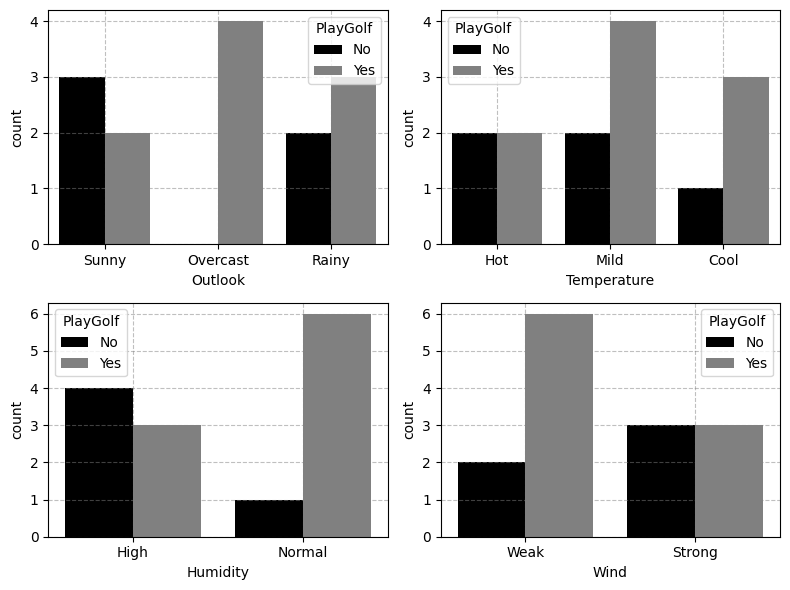

In [ ]:
green_palette = ["black", "grey"]
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
#plotting bar chart with grid lines
sns.countplot(x="Outlook", hue="PlayGolf", palette=green_palette, data=df, ax=axes[0, 0])
axes[0, 0].grid(True, ls='--', alpha=0.5, color='grey')
sns.countplot(x="Temperature", hue="PlayGolf", palette=green_palette, data=df, ax=axes[0, 1])
axes[0, 1].grid(True, ls='--', alpha=0.5, color='grey')
sns.countplot(x="Humidity", hue="PlayGolf", palette=green_palette, data=df, ax=axes[1, 0])
axes[1, 0].grid(True, ls='--', alpha=0.5, color='grey')
sns.countplot(x="Wind", hue="PlayGolf", palette=green_palette, data=df, ax=axes[1, 1])
axes[1, 1].grid(True, ls='--', alpha=0.5, color='grey')
plt.tight_layout()
plt.show()

In [ ]:
#function to highlighting
def highlight_yes_no(val):
    color = 'green' if val == 'Yes' else 'red'
    return f'background-color: {color}'

In [ ]:
df = df.style.applymap(highlight_yes_no, subset=['PlayGolf'])
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [ ]:
#number of 'Yes'
p = 9
#number of 'No'
n = 5

#entropy
entropy_s = -(p/(p+n)) * log2(p/(p+n)) - (n/(p+n)) * log2(n/(p+n))

print("Entropy (S) : ", entropy_s)

Entropy (S) :  0.9402859586706311


In [ ]:
outlook_values = {
    "Sunny": {"Yes": 2, "No": 3},
    "Rainy": {"Yes": 3, "No": 2},
    "Overcast": {"Yes": 4, "No": 0}
}

In [ ]:
#function to calculate entropy
def entropy(yes, no):
    total = yes + no
    entropy_yes = -(yes/total) * log2(yes/total) if yes else 0
    entropy_no = -(no/total) * log2(no/total) if no else 0
    return entropy_yes + entropy_no

entropies = {}

for i, j in outlook_values.items():
    entropies[i] = entropy(j["Yes"], j["No"])

In [ ]:
#defining the entropies for each outlook
entropy_sunny = 0.971
entropy_rainy = 0.971
entropy_overcast = 0.0
entropy_s = 0.940

In [ ]:
#counts of Yes and No for each outlook
sunny_p = 2
sunny_n = 3
rainy_p = 3
rainy_n = 2
overcast_p = 4
overcast_n = 0

In [ ]:
#total counts of Yes and No
total_p = 9
total_n = 5
total = total_p + total_n

In [ ]:
#weighted average entropy for outlook
weighted_entropy_outlook = (
    ((sunny_p + sunny_n) / total) * entropy_sunny +
    ((rainy_p + rainy_n) / total) * entropy_rainy +
    ((overcast_p + overcast_n) / total) * entropy_overcast
)

In [ ]:
#information gain
information_gain_outlook = entropy_s - weighted_entropy_outlook

In [ ]:
temperature_playgolf_dataset = {

    'Temperature': ['Hot', 'Hot', 'Hot', 'Hot', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Cool', 'Cool', 'Cool'],

    'PlayGolf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes']
}

In [ ]:
temperature_playgolf = pd.DataFrame(temperature_playgolf_dataset)

In [ ]:
#function to apply highlighting
def highlight_yes_no(val):
    color = 'green' if val == 'Yes' else 'red'
    return f'background-color: {color}'

In [ ]:
temperature_playgolf = temperature_playgolf.style.applymap(highlight_yes_no, subset=['PlayGolf'])
temperature_playgolf

,Temperature,PlayGolf
0,Hot,No
1,Hot,No
2,Hot,Yes
3,Hot,Yes
4,Mild,Yes
5,Mild,No
6,Mild,Yes
7,Mild,Yes
8,Mild,No
9,Cool,Yes


In [ ]:
#entropy for each temperature value
def entropy(p, n):
    #avoid log(0)
    if p == 0 or n == 0:
        return 0
    total = p + n
    return -p/total * log2(p/total) - n/total * log2(n/total)

#entropy for each temperature value
entropy_hot = entropy(2, 2)
entropy_mild = entropy(4, 2)
entropy_cool = entropy(3, 1)

#total entropy
total_entropy = 0.940

#weighted average information entropy for the temperature
#total yes
p_total = 9
#total no
n_total = 5
total_instances = p_total + n_total

I_temperature = (
    ((2 + 2) / total_instances) * entropy_hot +
    ((4 + 2) / total_instances) * entropy_mild +
    ((3 + 1) / total_instances) * entropy_cool
)

#gain for the Temperature
gain_temperature = total_entropy - I_temperature

print(f'Entropy for Hot Temperature: {entropy_hot:.3f}')
print(f'Entropy for Mild Temperature: {entropy_mild:.3f}')
print(f'Entropy for Cool Temperature: {entropy_cool:.3f}')
print(f'Average Information Entropy for Temperature: {I_temperature:.3f}')
print(f'Information Gain for Temperature: {gain_temperature:.3f}')

Entropy for Hot Temperature: 1.000
Entropy for Mild Temperature: 0.918
Entropy for Cool Temperature: 0.811
Average Information Entropy for Temperature: 0.911
Information Gain for Temperature: 0.029


In [ ]:
temperature_data = {
    'Temperature': ['Hot', 'Mild', 'Cool'],
    'Yes': [2, 4, 3],
    'No': [2, 2, 1],
    'Entropy': [entropy_hot, entropy_mild, entropy_cool]
}

temperature_df = pd.DataFrame(temperature_data)
temperature_df

,Temperature,Yes,No,Entropy
0,Hot,2,2,1.000000
1,Mild,4,2,0.918296
2,Cool,3,1,0.811278


In [ ]:
humidity_playgolf_data = {
    'Humidity': ['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'High', 'High', 'High', 'High', 'High', 'High', 'High'],
    'PlayGolf': ['Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No']
}

humidity_playgolf = pd.DataFrame(humidity_playgolf_data)

#function for  highlighting
def highlight_yes_no(val):
    color = 'green' if val == 'Yes' else 'red'
    return f'background-color: {color}'

humidity_playgolf_df = humidity_playgolf.style.applymap(highlight_yes_no, subset=['PlayGolf'])
humidity_playgolf_df

,Humidity,PlayGolf
0,Normal,Yes
1,Normal,No
2,Normal,Yes
3,Normal,Yes
4,Normal,Yes
5,Normal,Yes
6,Normal,Yes
7,High,No
8,High,No
9,High,Yes


In [ ]:
#entropy for Normal humidity
#yes for normal humidity
p_normal = 3
#no for normal humidity
n_normal = 4
entropy_normal = - (p_normal / (p_normal + n_normal)) * log2(p_normal / (p_normal + n_normal)) - \
                 (n_normal / (p_normal + n_normal)) * log2(n_normal / (p_normal + n_normal))

In [ ]:
#entropy for High humidity
#yes for high humidity
p_high = 6
#no for high humidity
n_high = 1
entropy_high = - (p_high / (p_high + n_high)) * log2(p_high / (p_high + n_high)) - \
        (n_high / (p_high + n_high)) * log2(n_high / (p_high + n_high))

In [ ]:
#total
total_yes = 9
total_no = 5
total_instances = total_yes + total_no

In [ ]:
#weighted average information entropy for the humidity
I_humidity = ((p_normal + n_normal) / total_instances) * entropy_normal + \
             ((p_high + n_high) / total_instances) * entropy_high

#gain for the humidity
#total entropy of the system
total_entropy = 0.940
gain_humidity = total_entropy - I_humidity

print("Entropy for 'Normal' Humidity:", round(entropy_normal, 4))
print("Entropy for 'High' Humidity:", round(entropy_high, 4))
print("Average Information Entropy for 'Humidity':", round(I_humidity, 4))
print("Information Gain for 'Humidity':", round(gain_humidity, 4))

Entropy for 'Normal' Humidity: 0.9852
Entropy for 'High' Humidity: 0.5917
Average Information Entropy for 'Humidity': 0.7885
Information Gain for 'Humidity': 0.1515


In [ ]:
#entropy for weak wind
#Yes for weak wind
p_weak = 6
#No for weak wind
n_weak = 2
entropy_weak = - (p_weak / (p_weak + n_weak)) * log2(p_weak / (p_weak + n_weak)) - \
               (n_weak / (p_weak + n_weak)) * log2(n_weak / (p_weak + n_weak))

#entropy for strong wind
#yes for strong wind
p_strong = 3
#No for strong wind
n_strong = 3
entropy_strong = - (p_strong / (p_strong + n_strong)) * log2(p_strong / (p_strong + n_strong)) - \
                 (n_strong / (p_strong + n_strong)) * log2(n_strong / (p_strong + n_strong))

In [ ]:
#weighted average information entropy for the wind
I_wind = ((p_weak + n_weak) / total_instances) * entropy_weak + \
         ((p_strong + n_strong) / total_instances) * entropy_strong

#gain for the wind
gain_wind = total_entropy - I_wind

print("Entropy for 'Weak' Wind:", round(entropy_weak,4))
print("Entropy for 'Strong' Wind:", round(entropy_strong,4))
print("Average Information Entropy for 'Wind':", round(I_wind,4))
print("Information Gain for 'Wind':", round(gain_wind,4))

Entropy for 'Weak' Wind: 0.8113
Entropy for 'Strong' Wind: 1.0
Average Information Entropy for 'Wind': 0.8922
Information Gain for 'Wind': 0.0478


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df_dummy =pd.get_dummies(data=df, columns=['Temperature', 'Humidity', 'Outlook', 'Wind'])
df_dummy

,PlayGolf,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Wind_Strong,Wind_Weak
0,No,0,1,0,1,0,0,0,1,0,1
1,No,0,1,0,1,0,0,0,1,1,0
2,Yes,0,1,0,1,0,1,0,0,0,1
3,Yes,0,0,1,1,0,0,1,0,0,1
4,Yes,1,0,0,0,1,0,1,0,0,1
5,No,1,0,0,0,1,0,1,0,1,0
6,Yes,1,0,0,0,1,1,0,0,1,0
7,No,0,0,1,1,0,0,0,1,0,1
8,Yes,1,0,0,0,1,0,0,1,0,1
9,Yes,0,0,1,0,1,0,1,0,0,1


In [ ]:
y = df_dummy['PlayGolf']
X = df_dummy.drop(columns='PlayGolf')

In [ ]:
y = df_dummy['PlayGolf']
X = df_dummy.drop(columns='PlayGolf')

In [ ]:
le = preprocessing.LabelEncoder()
X = X.apply(le.fit_transform)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [ ]:
X_train.shape, y_train.shape

((9, 10), (9,))

In [ ]:
X_test.shape, y_test.shape

((5, 10), (5,))

In [ ]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
predictions = dtree.predict(X_test)

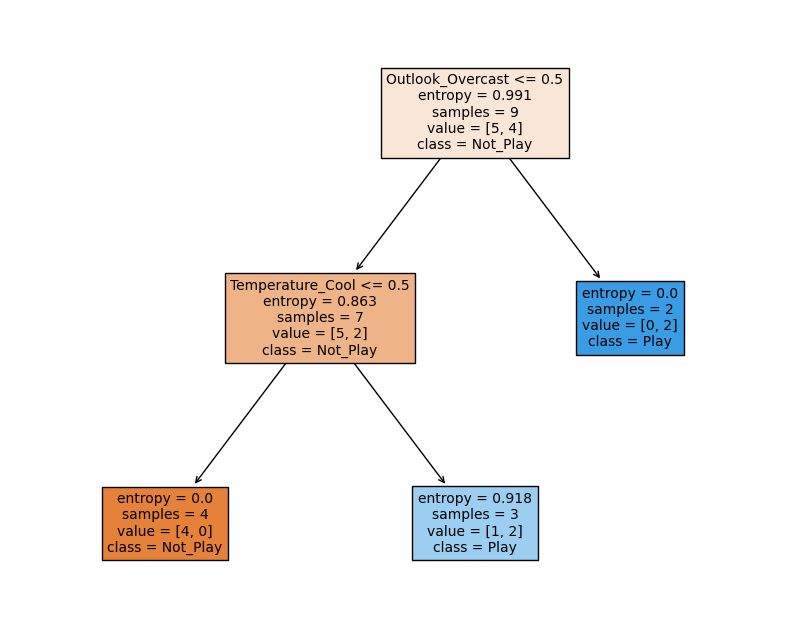

In [ ]:
fig = plt.figure(figsize=(10,8))
a = plot_tree(dtree, feature_names=X.columns, fontsize=10, filled=True,
              class_names=['Not_Play', 'Play'])

In [ ]:
predictions

array(['Yes', 'No', 'No', 'No', 'Yes'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.4
